In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

np.random.seed(sum(map(ord, "axis_grids")))
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


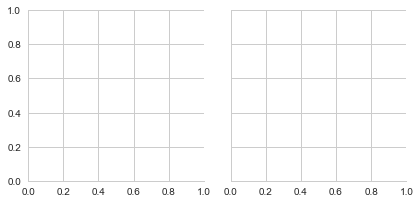

In [10]:
g = sns.FacetGrid(tips, col="time")

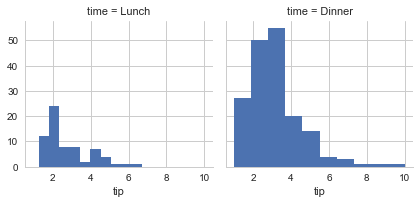

In [11]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip")

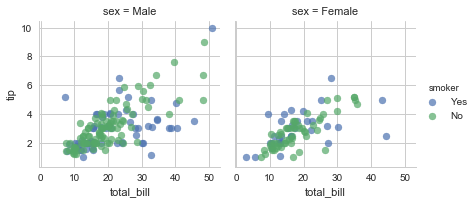

In [20]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7) # alpha 点的透明程度
g.add_legend(); # 说明项

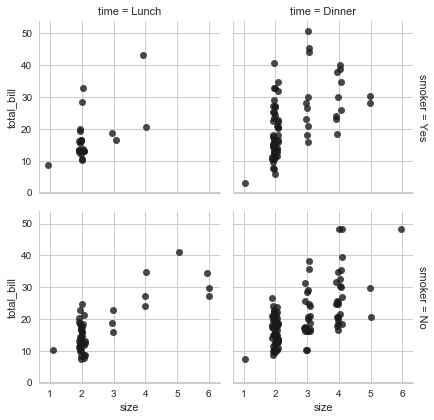

In [21]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".1", fit_reg=False, x_jitter=.1)
# color 值越大 点的颜色越浅
# x_jitter 点左右浮动

C:\Users\TNanko\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


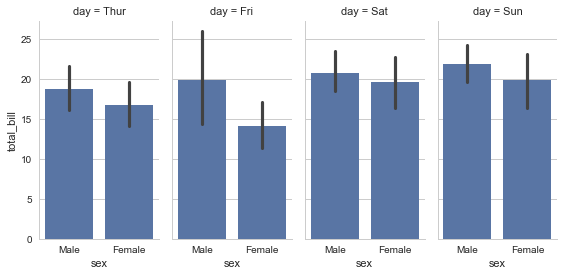

In [26]:
g = sns.FacetGrid(tips, col="day", size=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill");

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


C:\Users\TNanko\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


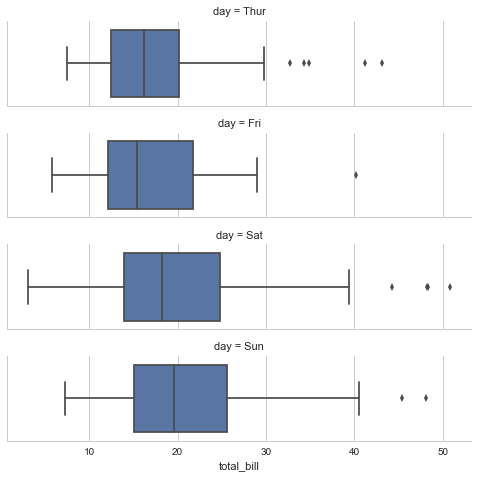

In [35]:
from pandas import Categorical
ordered_days = tips.day.value_counts().index
print(ordered_days)
ordered_days = Categorical(["Thur", "Fri", "Sat", "Sun"])
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  size=1.7, aspect=4)
g.map(sns.boxplot, "total_bill")

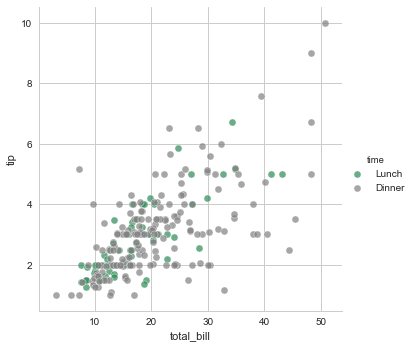

In [40]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, hue="time", palette=pal, size=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend()

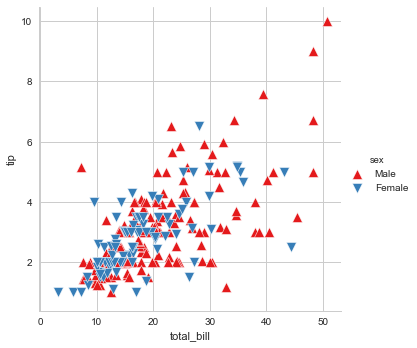

In [43]:
g = sns.FacetGrid(tips, hue="sex", palette="Set1", size=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend()

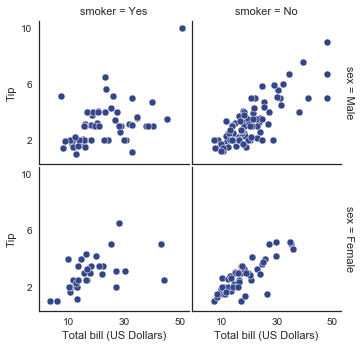

In [48]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, size=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5)
g.set_axis_labels("Total bill (US Dollars)", "Tip")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.fig.subplots_adjust(wspace=0.02, hspace=0.02)
# g.fig.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.02, hspace=0.02)

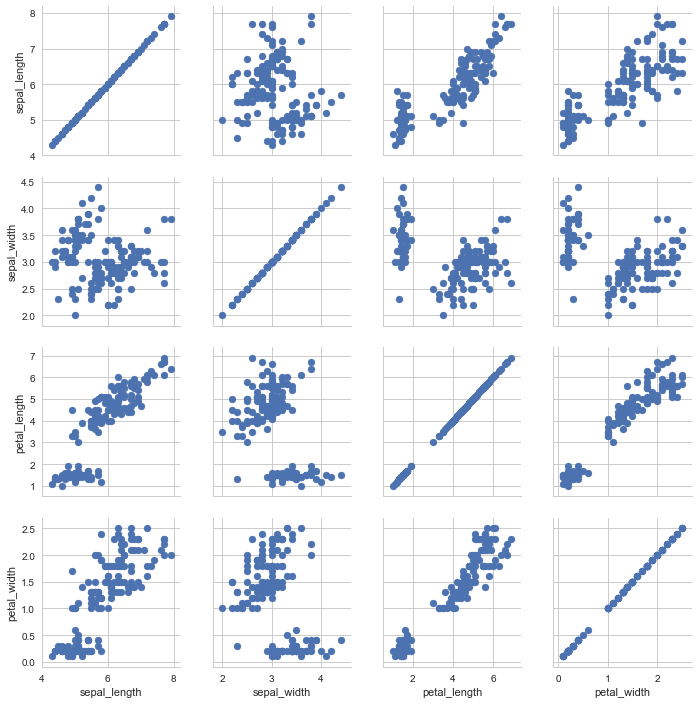

In [49]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter)

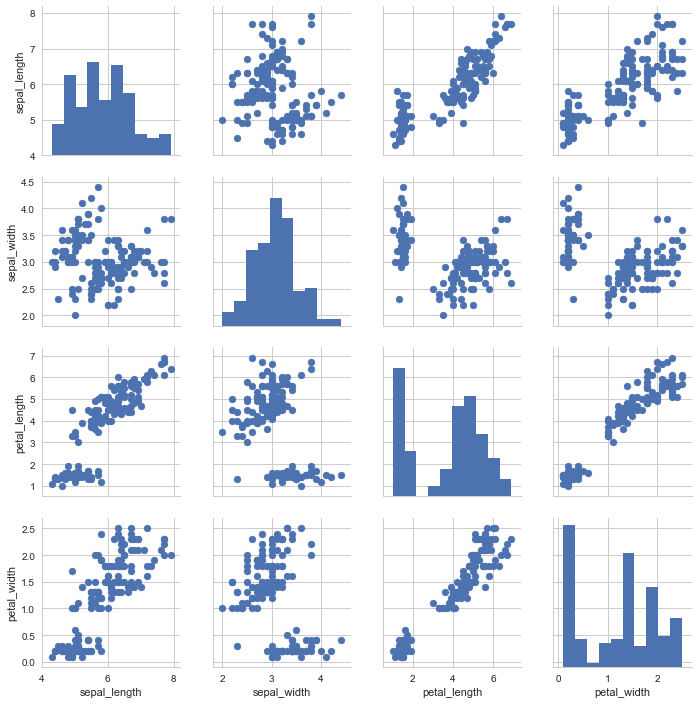

In [51]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist) # 对角线柱形图
g.map_offdiag(plt.scatter) # 非对角线散点图

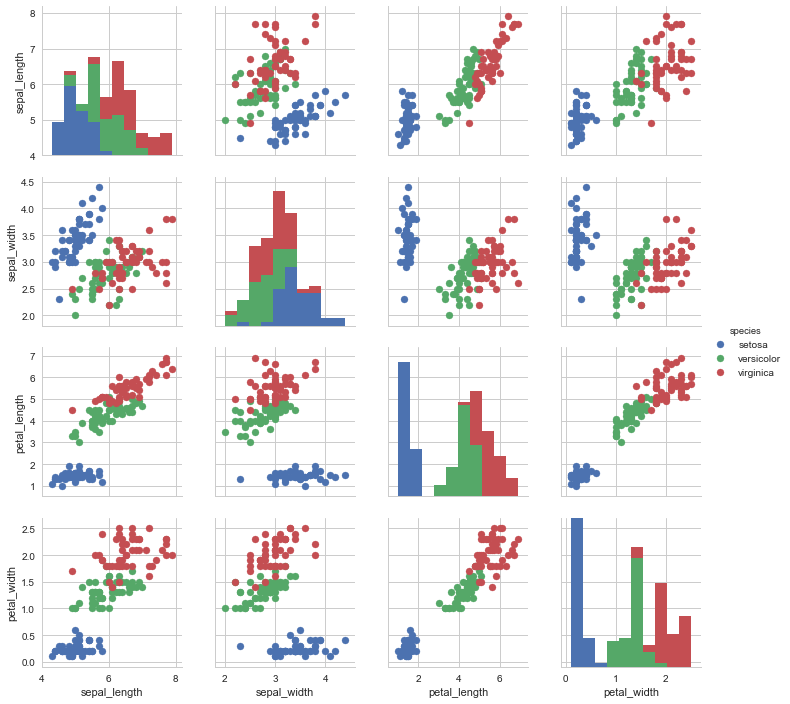

In [52]:
g = sns.PairGrid(data=iris, hue="species") # 添加一个类别
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

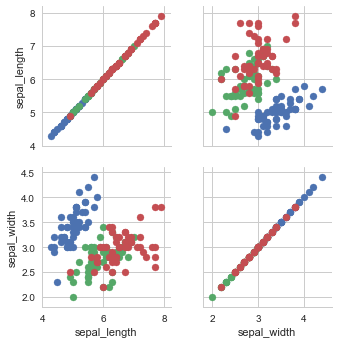

In [53]:
# vars 指定特征数据
g = sns.PairGrid(data=iris, vars=["sepal_length", "sepal_width"], hue="species")
g.map(plt.scatter)

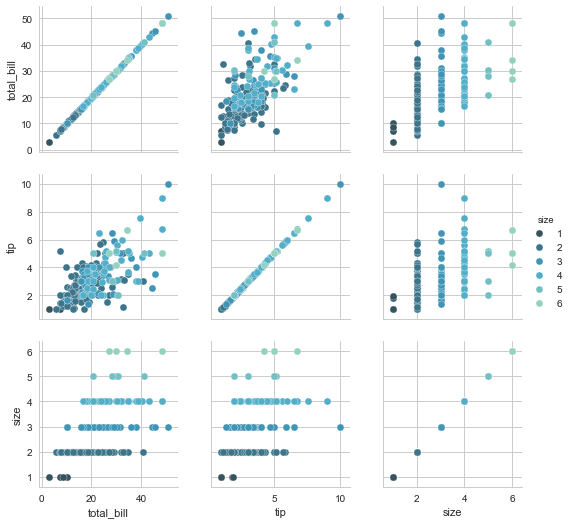

In [56]:
# 指定调色板
g = sns.PairGrid(tips, hue="size", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend()